<a href="https://colab.research.google.com/github/cipB14/Questify/blob/mod2/bertFinetune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.4 MB/s eta 0:00:00


In [ ]:
!pip install torch tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import os
os.makedirs("/root/.kaggle", exist_ok=True)


In [ ]:
!kaggle datasets download -d vijaydevane/blooms-taxonomy-dataset


Dataset URL: https://www.kaggle.com/datasets/vijaydevane/blooms-taxonomy-dataset
License(s): apache-2.0
100% 240k/240k [00:00<00:00, 421kB/s]
100% 240k/240k [00:00<00:00, 421kB/s]


Extraction of Zip File

In [ ]:
import zipfile

zip_path = "blooms-taxonomy-dataset.zip"
extract_path = "blooms_taxonomy_data"

# Extract ZIP file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files
import os
os.listdir(extract_path)


['blooms_taxonomy_dataset.csv']

In [ ]:
import pandas as pd

df = pd.read_csv("blooms_taxonomy_data/blooms_taxonomy_dataset.csv")
df.head()  # Display the first 5 rows



,Questions,Category
0,About what proportion of the population of the...,BT1
1,Correctly label the brain lobes indicated on t...,BT1
2,Define compound interest.,BT1
3,Define four types of traceability,BT1
4,Define mercantilism.,BT1


Importing necessary Libraries for Fine tuning

In [ ]:
import numpy as np
import pandas as pd
import time
import datetime
import gc
import random
from nltk.corpus import stopwords
import re

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler,random_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import transformers
from transformers import BertForSequenceClassification, AdamW, BertConfig,BertTokenizer,get_linear_schedule_with_warmup

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Preprocess text data

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
'''
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df['clean_text'] = df['Questions'].apply(clean_text)  # Apply cleaning function
df.head()
'''

'\nnltk.download(\'stopwords\')\nstop_words = set(stopwords.words(\'english\'))\n\ndef clean_text(text):\n    text = text.lower()  # Convert to lowercase\n    text = re.sub(r\'\\W\', \' \', text)  # Remove special characters\n    text = re.sub(r\'\\s+\', \' \', text)  # Remove extra spaces\n    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords\n    return text\n\ndf[\'clean_text\'] = df[\'Questions\'].apply(clean_text)  # Apply cleaning function\ndf.head()\n'

Convert Label to numbers

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Category'])  # Encode labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {'BT1': 0, 'BT2': 1, 'BT3': 2, 'BT4': 3, 'BT5': 4, 'BT6': 5}


Split dataset to train and test data

In [ ]:
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['Questions'], df['label'], test_size=0.2, random_state=42
)


In [ ]:
print(type(train_labels))  # Should be list, NumPy array, or Pandas Series
print(type(val_labels))


<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
token_lengths = [len(tokenizer(text)['input_ids']) for text in train_texts]
'''
# Get statistics
print("Max token length:", np.max(token_lengths))
print("Average token length:", np.mean(token_lengths))
print("90th percentile length:", np.percentile(token_lengths, 90))
'''
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=128)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Tensor dataset


In [ ]:
import torch


train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings['input_ids']),
    torch.tensor(train_encodings['attention_mask']),
    train_labels
)

val_dataset = torch.utils.data.TensorDataset(
    torch.tensor(val_encodings['input_ids']),
    torch.tensor(val_encodings['attention_mask']),
    val_labels
)


In [ ]:
from torch.utils.data import DataLoader, RandomSampler

# Batch size
batch_size = 16  # Adjust based on GPU memory

# Define train DataLoader
train_dataloader = DataLoader(
    train_dataset,
    sampler=RandomSampler(train_dataset),
    batch_size=batch_size
)

# Define validation DataLoader
val_dataloader = DataLoader(
    val_dataset,
    sampler=SequentialSampler(val_dataset),
    batch_size=batch_size
)


In [ ]:
# Load Pretrained BERT model for Classification
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=len(label_mapping)  # Number of Bloom's Taxonomy categories
)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e


🔹 Training with Learning Rate: 3e-05, Epochs: 4


Epoch 1/4: 100%|██████████| 439/439 [02:28<00:00,  2.95it/s, Loss=0.183]


Epoch 1 - Average Training Loss: 0.5372


Validating: 100%|██████████| 110/110 [00:08<00:00, 12.69it/s]


  ✅ Accuracy: 80.3877% | 🎯 Precision: 0.8112 | 🔄 Recall: 0.8039 | 🏆 F1-score: 0.8025
✅ Validation Loss: 0.5621


Epoch 2/4: 100%|██████████| 439/439 [02:27<00:00,  2.97it/s, Loss=0.79]


Epoch 2 - Average Training Loss: 0.3521


Validating: 100%|██████████| 110/110 [00:08<00:00, 12.60it/s]


  ✅ Accuracy: 79.8746% | 🎯 Precision: 0.8065 | 🔄 Recall: 0.7987 | 🏆 F1-score: 0.7960
✅ Validation Loss: 0.5901


Epoch 3/4: 100%|██████████| 439/439 [02:27<00:00,  2.97it/s, Loss=0.186]


Epoch 3 - Average Training Loss: 0.2394


Validating: 100%|██████████| 110/110 [00:08<00:00, 12.61it/s]


  ✅ Accuracy: 80.5017% | 🎯 Precision: 0.8063 | 🔄 Recall: 0.8050 | 🏆 F1-score: 0.8045
✅ Validation Loss: 0.6000


Epoch 4/4: 100%|██████████| 439/439 [02:27<00:00,  2.97it/s, Loss=0.577]


Epoch 4 - Average Training Loss: 0.1511


Validating: 100%|██████████| 110/110 [00:08<00:00, 12.64it/s]


  ✅ Accuracy: 81.0148% | 🎯 Precision: 0.8109 | 🔄 Recall: 0.8101 | 🏆 F1-score: 0.8098
✅ Validation Loss: 0.6513

📊 Final Results Table:
+----+-----------------+---------+--------------+------------+------------+-------------+----------+------------+
|    |   Learning Rate |   Epoch |   Train Loss |   Val Loss |   Accuracy |   Precision |   Recall |   F1 Score |
+====+=================+=========+==============+============+============+=============+==========+============+
|  0 |           3e-05 |       1 |     0.537165 |   0.562073 |   0.803877 |    0.811185 | 0.803877 |   0.80248  |
+----+-----------------+---------+--------------+------------+------------+-------------+----------+------------+
|  1 |           3e-05 |       2 |     0.352088 |   0.590062 |   0.798746 |    0.806528 | 0.798746 |   0.796017 |
+----+-----------------+---------+--------------+------------+------------+-------------+----------+------------+
|  2 |           3e-05 |       3 |     0.239417 |   0.600022 |   0.

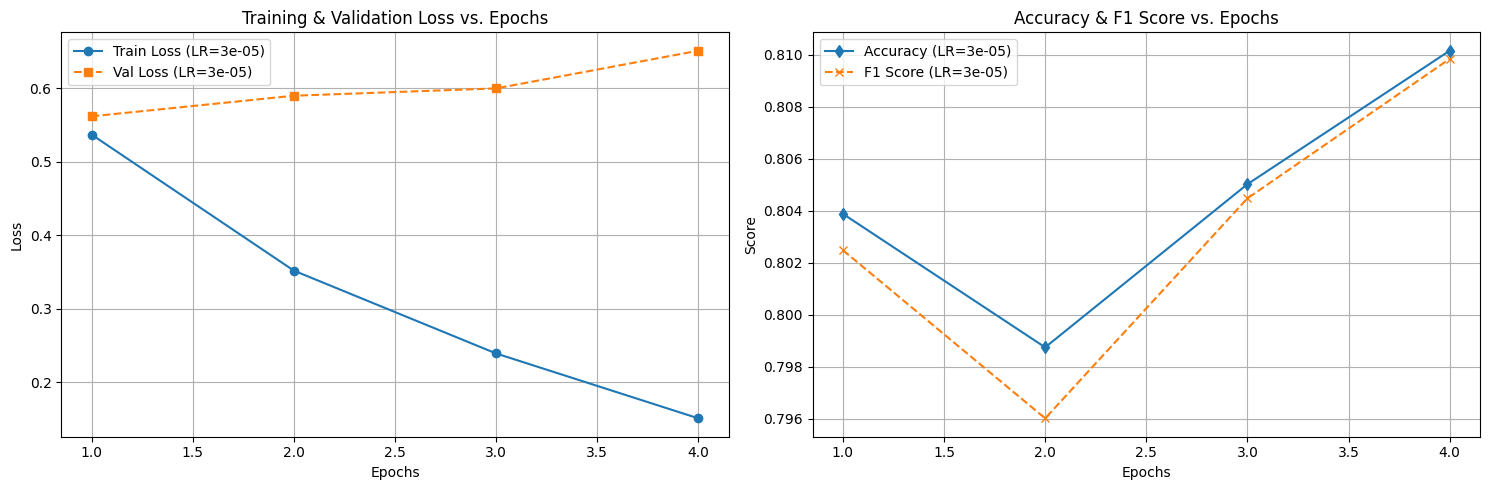

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
from transformers import get_scheduler
from torch.optim import AdamW
import torch
import torch.nn as nn
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Hyperparameter settings
epoch_values = [4]
learning_rates = [3e-5]

# Dictionary to store results
results = []

for lr in learning_rates:
    for epochs in epoch_values:
        print(f"\n🔹 Training with Learning Rate: {lr}, Epochs: {epochs}")

        # Define optimizer and scheduler
        optimizer = AdamW(model.parameters(), lr=lr, eps=1e-8)
        total_steps = len(train_dataloader) * epochs
        scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=total_steps)


# Compute class counts
        train_label_counts = torch.bincount(train_labels)  # Get counts of each label
        total_samples = len(train_labels)  # Total number of training samples

# Compute class weights (Inverse Frequency)
        class_weights = total_samples / (len(train_label_counts) * train_label_counts.float())

# Normalize the weights
        class_weights = class_weights / class_weights.sum()

# Move to GPU if available
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        class_weights = class_weights.to(device)
        loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights.to(device))
       # loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)
        print("Class Weights:", class_weights)


        # Lists to store per-epoch metrics
        train_losses, val_losses, accuracies, f1_scores = [], [], [], []

        for epoch in range(epochs):
            model.train()
            total_loss = 0

            progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{epochs}", leave=True)

            for batch in progress_bar:
                batch_inputs, batch_masks, batch_labels = [t.to(device) for t in batch]
                optimizer.zero_grad()
                outputs = model(input_ids=batch_inputs, attention_mask=batch_masks, labels=batch_labels)
                loss = outputs.loss
                loss.backward()
                optimizer.step()
                scheduler.step()

                total_loss += loss.item()
                progress_bar.set_postfix({"Loss": loss.item()})

            avg_train_loss = total_loss / len(train_dataloader)
            print(f"Epoch {epoch+1} - Average Training Loss: {avg_train_loss:.4f}")

            # 🔍 Validation
            model.eval()
            all_preds, all_labels = [], []
            total_val_loss = 0

            with torch.no_grad():
                progress_bar = tqdm(val_dataloader, desc="Validating")
                for batch in progress_bar:
                    batch_inputs, batch_masks, batch_labels = [t.to(device) for t in batch]
                    outputs = model(input_ids=batch_inputs, attention_mask=batch_masks, labels=batch_labels)
                    loss = outputs.loss
                    total_val_loss += loss.item()
                    predictions = torch.argmax(outputs.logits, dim=1)
                    all_preds.extend(predictions.cpu().numpy())
                    all_labels.extend(batch_labels.cpu().numpy())

            # Compute metrics
            acc = accuracy_score(all_labels, all_preds)
            precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average="weighted")
            avg_val_loss = total_val_loss / len(val_dataloader)

            print(f"  ✅ Accuracy: {acc:.4%} | 🎯 Precision: {precision:.4f} | 🔄 Recall: {recall:.4f} | 🏆 F1-score: {f1:.4f}")
            print(f"✅ Validation Loss: {avg_val_loss:.4f}")

            # Store results
            train_losses.append(avg_train_loss)
            val_losses.append(avg_val_loss)
            accuracies.append(acc)
            f1_scores.append(f1)

            # Append data to results list
            results.append([lr, epoch + 1, avg_train_loss, avg_val_loss, acc, precision, recall, f1])

# 📌 Convert results to DataFrame
df_results = pd.DataFrame(results, columns=["Learning Rate", "Epoch", "Train Loss", "Val Loss", "Accuracy", "Precision", "Recall", "F1 Score"])
print("\n📊 Final Results Table:")
print(tabulate(df_results, headers="keys", tablefmt="grid"))

# 📊 Plot graphs
plt.figure(figsize=(15, 5))

# 📉 Training & Validation Loss
plt.subplot(1, 2, 1)
for lr in learning_rates:
    df_lr = df_results[df_results["Learning Rate"] == lr]
    plt.plot(df_lr["Epoch"], df_lr["Train Loss"], marker='o', linestyle='-', label=f'Train Loss (LR={lr})')
    plt.plot(df_lr["Epoch"], df_lr["Val Loss"], marker='s', linestyle='--', label=f'Val Loss (LR={lr})')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss vs. Epochs")
plt.legend()
plt.grid(True)

# 🎯 Accuracy & F1 Score
plt.subplot(1, 2, 2)
for lr in learning_rates:
    df_lr = df_results[df_results["Learning Rate"] == lr]
    plt.plot(df_lr["Epoch"], df_lr["Accuracy"], marker='d', linestyle='-', label=f'Accuracy (LR={lr})')
    plt.plot(df_lr["Epoch"], df_lr["F1 Score"], marker='x', linestyle='--', label=f'F1 Score (LR={lr})')
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.title("Accuracy & F1 Score vs. Epochs")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
save_directory = "/content/drive/MyDrive/bert-blooms-taxonomy-classifier"
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

In [ ]:
!pip install huggingface_hub
!huggingface-cli login
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
model_name = "cip29/blooms_bert"

# Load your trained model and tokenizer
model = BertForSequenceClassification.from_pretrained(save_directory)
tokenizer = BertTokenizer.from_pretrained( save_directory)

# Push model to Hugging Face
model.push_to_hub(model_name)
tokenizer.push_to_hub(model_name)

print(f"Model pushed successfully! You can find it at: https://huggingface.co/{model_name}")

In [ ]:
df['Questions_length'] = df['Questions'].str.len()